Importing all the required libraries for to load and analyse the data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("house_price_regression_dataset (1).csv")

In [3]:
df

,Square_Footage,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size,Garage_Size,Neighborhood_Quality,House_Price
0,1360,2,1,1981,0.599637,0,5,2.623829e+05
1,4272,3,3,2016,4.753014,1,6,9.852609e+05
2,3592,1,2,2016,3.634823,0,9,7.779774e+05
3,966,1,2,1977,2.730667,1,8,2.296989e+05
4,4926,2,1,1993,4.699073,0,8,1.041741e+06
...,...,...,...,...,...,...,...,...
995,3261,4,1,1978,2.165110,2,10,7.014940e+05
996,3179,1,2,1999,2.977123,1,10,6.837232e+05
997,2606,4,2,1962,4.055067,0,2,5.720240e+05
998,4723,5,2,1950,1.930921,0,7,9.648653e+05


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Square_Footage        1000 non-null   int64  
 1   Num_Bedrooms          1000 non-null   int64  
 2   Num_Bathrooms         1000 non-null   int64  
 3   Year_Built            1000 non-null   int64  
 4   Lot_Size              1000 non-null   float64
 5   Garage_Size           1000 non-null   int64  
 6   Neighborhood_Quality  1000 non-null   int64  
 7   House_Price           1000 non-null   float64
dtypes: float64(2), int64(6)
memory usage: 62.6 KB


In [5]:
df.describe()

,Square_Footage,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size,Garage_Size,Neighborhood_Quality,House_Price
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03
mean,2815.422000,2.990000,1.973000,1986.550000,2.778087,1.022000,5.615000,6.188610e+05
std,1255.514921,1.427564,0.820332,20.632916,1.297903,0.814973,2.887059,2.535681e+05
min,503.000000,1.000000,1.000000,1950.000000,0.506058,0.000000,1.000000,1.116269e+05
25%,1749.500000,2.000000,1.000000,1969.000000,1.665946,0.000000,3.000000,4.016482e+05
50%,2862.500000,3.000000,2.000000,1986.000000,2.809740,1.000000,6.000000,6.282673e+05
75%,3849.500000,4.000000,3.000000,2004.250000,3.923317,2.000000,8.000000,8.271413e+05
max,4999.000000,5.000000,3.000000,2022.000000,4.989303,2.000000,10.000000,1.108237e+06


As we can see that the data doesn't contain any null values

In [6]:
df.isna().sum()

Square_Footage          0
Num_Bedrooms            0
Num_Bathrooms           0
Year_Built              0
Lot_Size                0
Garage_Size             0
Neighborhood_Quality    0
House_Price             0
dtype: int64

Average house prices increase by year

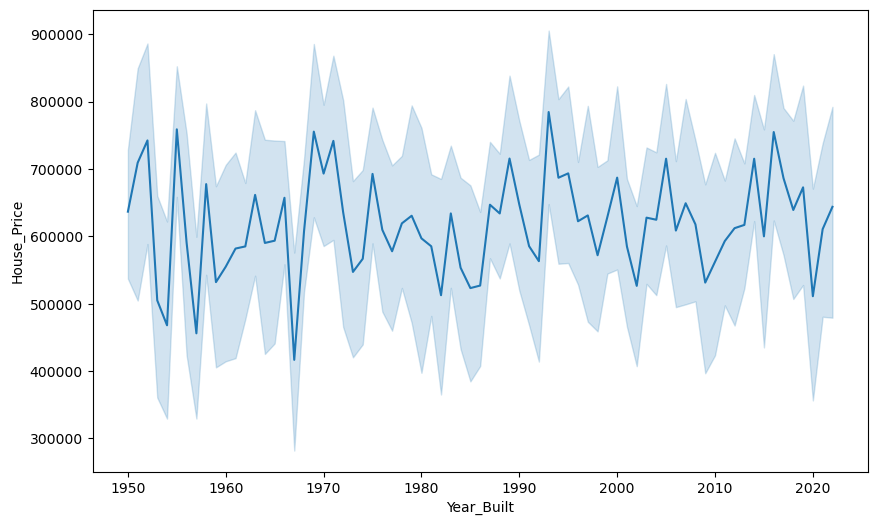

In [7]:
plt.figure(figsize=(10,6))
sns.lineplot(data=df,x="Year_Built",y="House_Price",estimator="mean")
plt.show()

Boxplot for the house price,Square_Footage, Lot_Size

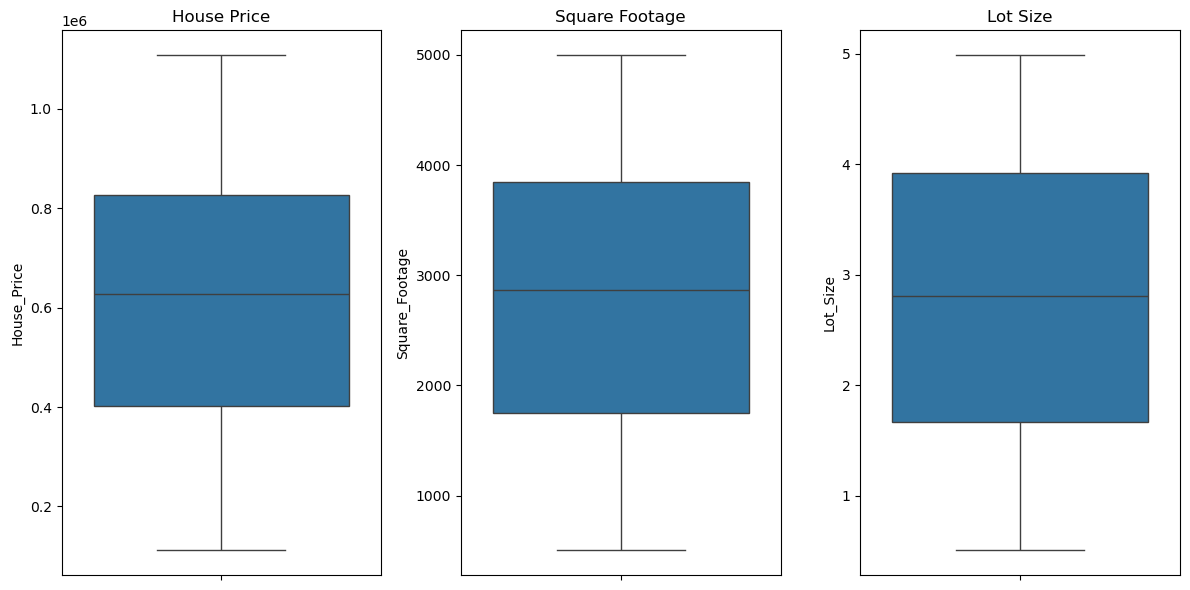

In [8]:
plt.figure(figsize=(12, 6))

# House Price
plt.subplot(1, 3, 1)
sns.boxplot(y=df["House_Price"])
plt.title("House Price")

# Square Footage
plt.subplot(1, 3, 2)
sns.boxplot(y=df["Square_Footage"])
plt.title("Square Footage")

# Lot Size
plt.subplot(1, 3, 3)
sns.boxplot(y=df["Lot_Size"])
plt.title("Lot Size")

plt.tight_layout()
plt.show()


Correlation matrix and heatmap to see which features strongly relate to House_Price

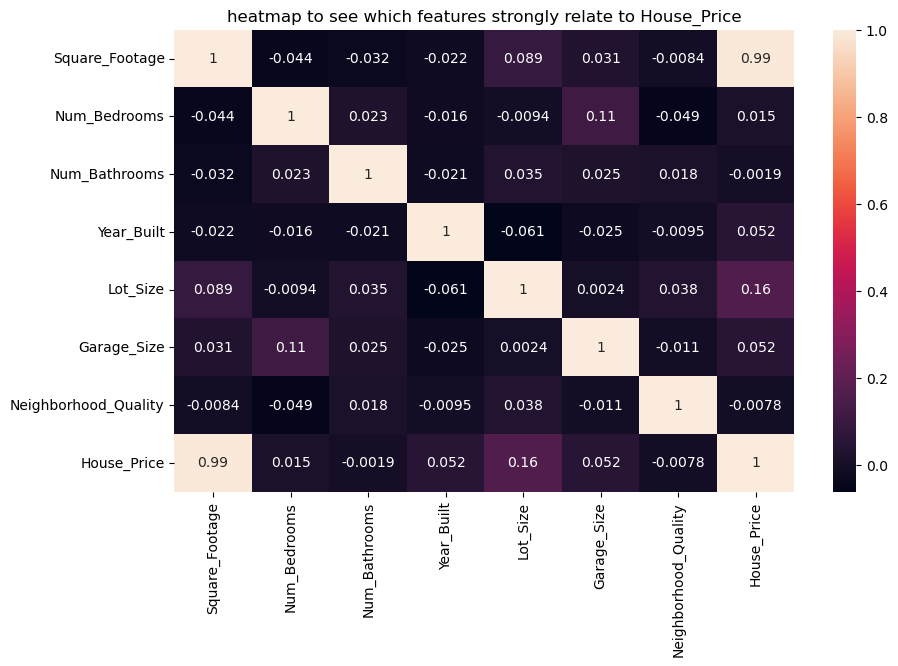

In [9]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True)
plt.title("heatmap to see which features strongly relate to House_Price")
plt.show()

Average square footage by number of the bedrooms

In [10]:
avg_bed_room=df.groupby("Num_Bedrooms")["Square_Footage"].mean()
print(f"Average square footage by number of the bedrooms is: {round(avg_bed_room)}")

Average square footage by number of the bedrooms is: Num_Bedrooms
1    2876.0
2    2773.0
3    2997.0
4    2766.0
5    2686.0
Name: Square_Footage, dtype: float64


Spliting the data set into 2 parts for the inputs and outputs

In [11]:
df.columns

Index(['Square_Footage', 'Num_Bedrooms', 'Num_Bathrooms', 'Year_Built',
       'Lot_Size', 'Garage_Size', 'Neighborhood_Quality', 'House_Price'],
      dtype='object')

In [12]:
#For inputs
x=df[['Square_Footage', 'Num_Bedrooms', 'Num_Bathrooms', 'Year_Built',
       'Lot_Size', 'Garage_Size', 'Neighborhood_Quality']]

#For outputs
y=df['House_Price']

We building this model for to predict the house price with the help of the linear regression algorithm

Importing the following libraries for the model building

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score

spliting the input and output data for training and testing the model

In [14]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=2)

Model calling

In [15]:
model=LinearRegression()

In [16]:
model.fit(x_train,y_train)

LinearRegression()

Model testing

In [17]:
y_pred=model.predict(x_test)

In [18]:
print(mean_squared_error(y_test,y_pred))

97084024.53517789


In [19]:
print(r2_score(y_test,y_pred))
#As the r2_score~=1 so the model trained and tested well

0.9984442376476842


Model dumping and loading with  the help of joblib

In [20]:
import joblib

joblib.dump(model,"model.pkl")

['model.pkl']

In [21]:
joblib.load("model.pkl")

LinearRegression()

In [22]:
df.head()

,Square_Footage,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size,Garage_Size,Neighborhood_Quality,House_Price
0,1360,2,1,1981,0.599637,0,5,2.623829e+05
1,4272,3,3,2016,4.753014,1,6,9.852609e+05
2,3592,1,2,2016,3.634823,0,9,7.779774e+05
3,966,1,2,1977,2.730667,1,8,2.296989e+05
4,4926,2,1,1993,4.699073,0,8,1.041741e+06


In [23]:
result=model.predict([x.iloc[0].values])

C:\Users\Varun\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [24]:
print(result)

[267117.13370532]
